In [2]:
# 라이브러리
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# 시각화를 위한 한글 폰트 설정
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
# 시각화 선명하게 설정
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 더 선명하게 보임
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
# 파일불러오기 ( NS 홈쇼핑 - 실적 데이터 )
ns = pd.read_csv("dummy2.csv")
ns

Unnamed: 0             datetime  exposure  mother_code    code  \
0               0  2019-01-01 06:00:00      20.0       100346  201072   
1               1  2019-01-01 06:00:00       NaN       100346  201079   
2               2  2019-01-01 06:20:00      20.0       100346  201072   
3               3  2019-01-01 06:20:00       NaN       100346  201079   
4               4  2019-01-01 06:40:00      20.0       100346  201072   
...           ...                  ...       ...          ...     ...   
38304       38304  2020-01-01 00:20:00      20.0       100073  200196   
38305       38305  2020-01-01 00:40:00      20.0       100073  200196   
38306       38306  2020-01-01 01:00:00      20.0       100073  200196   
38307       38307  2020-01-01 01:20:00      20.0       100490  201478   
38308       38308  2020-01-01 01:40:00      17.0       100490  201478   

                           name category    price    revenue  year  month  \
0                 테이트 남성 셀린니트3종       의류  39900.0  2099000.0  2019      1   
1                 테이트 여성 셀린니트3종       의류  39900.0  4371000.0  2019      1   
2                 테이트 남성 셀린니트3종       의류  39900.0  3262000.0  2019      1   
3                 테이트 여성 셀린니트3종       의류  39900.0  6955000.0  2019      1   
4                 테이트 남성 셀린니트3종       의류  39900.0  6672000.0  2019      1   
...                         ...      ...      ...        ...   ...    ...   
38304  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38305  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38306  삼성화재 행복한파트너 주택화재보험(1912)       무형      NaN        NaN  2020      1   
38307        더케이 예다함 상조서비스(티포트)       무형      NaN        NaN  2020      1   
38308        더케이 예다함 상조서비스(티포트)       무형      NaN        NaN  2020      1   

       date      time       count sex installment  dayofweek  
0         1  06:00:00   52.606516  남성          무관          1  
1         1  06:00:00  109.548872  여성          무관          1  
2         1  06:20:00   81.754386  남성          무관          1  
3         1  06:20:00  174.310777  여성          무관          1  
4         1  06:40:00  167.218045  남성          무관          1  
...     ...       ...         ...  ..         ...        ...  
38304     1  00:20:00         NaN  무관          무관          2  
38305     1  00:40:00         NaN  무관          무관          2  
38306     1  01:00:00         NaN  무관          무관          2  
38307     1  01:20:00         NaN  무관          무관          2  
38308     1  01:40:00         NaN  무관          무관          2  

[38309 rows x 17 columns]

In [6]:
ns['YMD'] = ns['datetime'].astype(str).map(lambda x : x[:10]) # 시간제외
ns['YMD'].head(100) # 확인 완료 

0     2019-01-01
1     2019-01-01
2     2019-01-01
3     2019-01-01
4     2019-01-01
         ...    
95    2019-01-02
96    2019-01-02
97    2019-01-02
98    2019-01-02
99    2019-01-02
Name: YMD, Length: 100, dtype: object

In [7]:
# 파일불러오기 ( 날씨 데이터 (평균,최저,최고, 강수량 전국 평균) )
weather = pd.read_csv("서울.csv",encoding='cp949')
weather

YMD  평균기온  최고기온  최저기온  강수량  신적설  평균풍속  평균습도   운량  일조시간  미세먼지  \
0    2019-01-01  -5.0  -0.6  -8.2  0.0  0.0   2.2    50  3.4   7.5  41.0   
1    2019-01-02  -4.9   0.2  -8.8  0.0  0.0   1.7    43  0.0   8.7  38.0   
2    2019-01-03  -3.5   3.2  -8.4  0.0  0.0   1.3    39  0.1   8.7  41.0   
3    2019-01-04  -1.1   4.1  -6.2  0.0  0.0   1.2    56  5.5   3.9  77.0   
4    2019-01-05  -2.8   1.1  -5.5  0.0  0.0   2.2    40  0.5   8.6  73.0   
..          ...   ...   ...   ...  ...  ...   ...   ...  ...   ...   ...   
360  2019-12-27  -1.7   2.6  -4.6  0.0  0.0   2.2    45  0.0   9.0  37.0   
361  2019-12-28   1.1   6.1  -3.6  0.0  0.0   2.0    48  3.5   5.8  47.0   
362  2019-12-29   3.8   6.2   1.1  1.4  0.0   3.0    53  9.0   0.0  47.0   
363  2019-12-30   2.6   6.8  -5.7  0.4  0.0   2.9    70  7.5   0.0  43.0   
364  2019-12-31  -7.9  -4.5 -10.9  0.0  0.0   3.1    39  1.2   9.1  31.0   

              날씨  
0           구름조금  
1             맑음  
2             맑음  
3        구름많음/안개  
4          맑음/안개  
..           ...  
360        맑음/안개  
361         구름조금  
362         흐림/비  
363  구름많음/눈/비/안개  
364         맑음/눈  

[365 rows x 12 columns]

In [8]:
# 파일 결합, 저장(이름이 같은 컬럼 필수!!)
ns = pd.merge(ns, weather)
ns = pd.DataFrame(ns)
ns.to_csv('C:/Users/rmafu/Desktop/bigcon-master/bigcon-master/ns_seoul_weather.csv')

In [9]:
ns

Unnamed: 0             datetime  exposure  mother_code    code  \
0               0  2019-01-01 06:00:00      20.0       100346  201072   
1               1  2019-01-01 06:00:00       NaN       100346  201079   
2               2  2019-01-01 06:20:00      20.0       100346  201072   
3               3  2019-01-01 06:20:00       NaN       100346  201079   
4               4  2019-01-01 06:40:00      20.0       100346  201072   
...           ...                  ...       ...          ...     ...   
38295       38295  2019-12-31 23:20:00       NaN       100448  201391   
38296       38296  2019-12-31 23:40:00      20.0       100448  201383   
38297       38297  2019-12-31 23:40:00       NaN       100448  201390   
38298       38298  2019-12-31 23:40:00       NaN       100448  201384   
38299       38299  2019-12-31 23:40:00       NaN       100448  201391   

                 name category     price     revenue  year  ...  최고기온  최저기온  \
0       테이트 남성 셀린니트3종       의류   39900.0   2099000.0  2019  ...  -0.6  -8.2   
1       테이트 여성 셀린니트3종       의류   39900.0   4371000.0  2019  ...  -0.6  -8.2   
2       테이트 남성 셀린니트3종       의류   39900.0   3262000.0  2019  ...  -0.6  -8.2   
3       테이트 여성 셀린니트3종       의류   39900.0   6955000.0  2019  ...  -0.6  -8.2   
4       테이트 남성 셀린니트3종       의류   39900.0   6672000.0  2019  ...  -0.6  -8.2   
...               ...      ...       ...         ...   ...  ...   ...   ...   
38295   일시불쿠첸압력밥솥 6인용       주방  148000.0   1664000.0  2019  ...  -4.5 -10.9   
38296  무이자쿠첸압력밥솥 10인용       주방  178000.0   9149000.0  2019  ...  -4.5 -10.9   
38297  일시불쿠첸압력밥솥 10인용       주방  168000.0  15282000.0  2019  ...  -4.5 -10.9   
38298   무이자쿠첸압력밥솥 6인용       주방  158000.0   2328000.0  2019  ...  -4.5 -10.9   
38299   일시불쿠첸압력밥솥 6인용       주방  148000.0  10157000.0  2019  ...  -4.5 -10.9   

       강수량  신적설 평균풍속 평균습도   운량 일조시간  미세먼지    날씨  
0      0.0  0.0  2.2   50  3.4  7.5  41.0  구름조금  
1      0.0  0.0  2.2   50  3.4  7.5  41.0  구름조금  
2      0.0  0.0  2.2   50  3.4  7.5  41.0  구름조금  
3      0.0  0.0  2.2   50  3.4  7.5  41.0  구름조금  
4      0.0  0.0  2.2   50  3.4  7.5  41.0  구름조금  
...    ...  ...  ...  ...  ...  ...   ...   ...  
38295  0.0  0.0  3.1   39  1.2  9.1  31.0  맑음/눈  
38296  0.0  0.0  3.1   39  1.2  9.1  31.0  맑음/눈  
38297  0.0  0.0  3.1   39  1.2  9.1  31.0  맑음/눈  
38298  0.0  0.0  3.1   39  1.2  9.1  31.0  맑음/눈  
38299  0.0  0.0  3.1   39  1.2  9.1  31.0  맑음/눈  

[38300 rows x 29 columns]

### revenue - 서울 평균기온, 강수량, 미세먼지, 평균습도, 평균풍속, 일조량

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


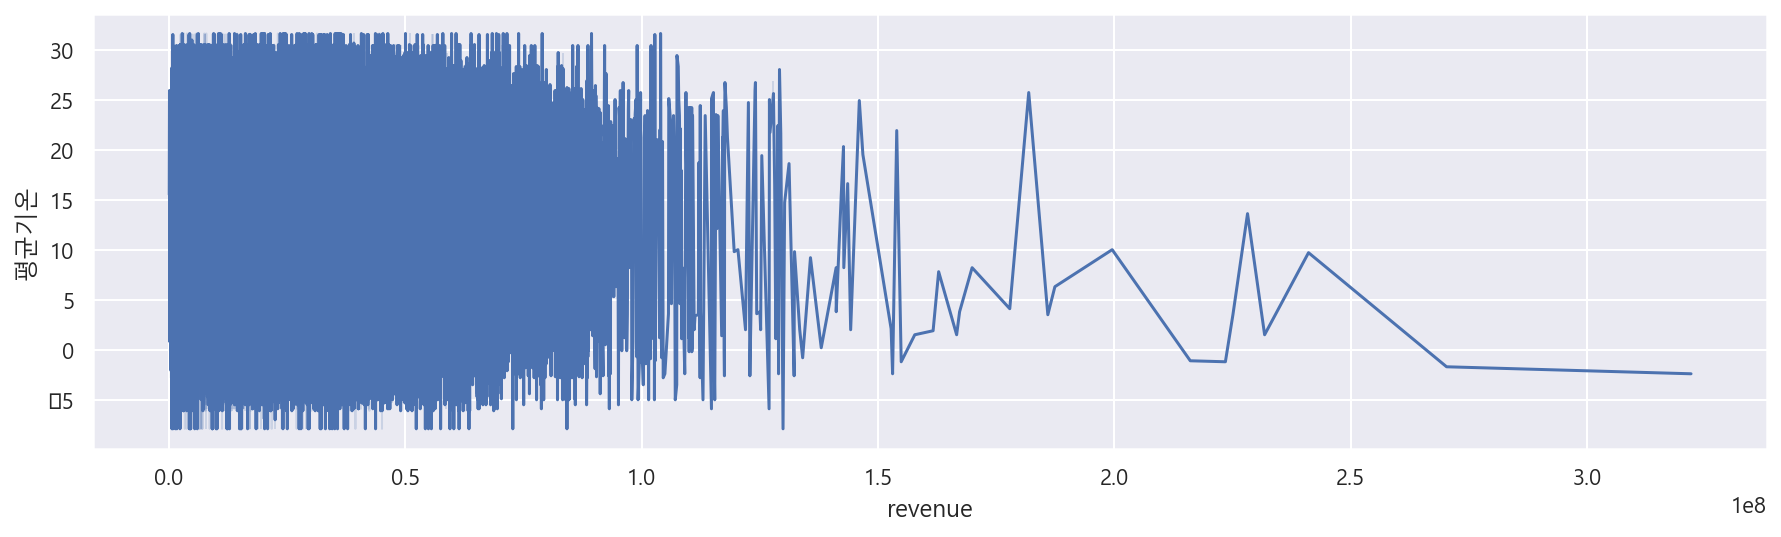

In [10]:
# 평균기온 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='평균기온')

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1080x288 with 0 Axes>

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


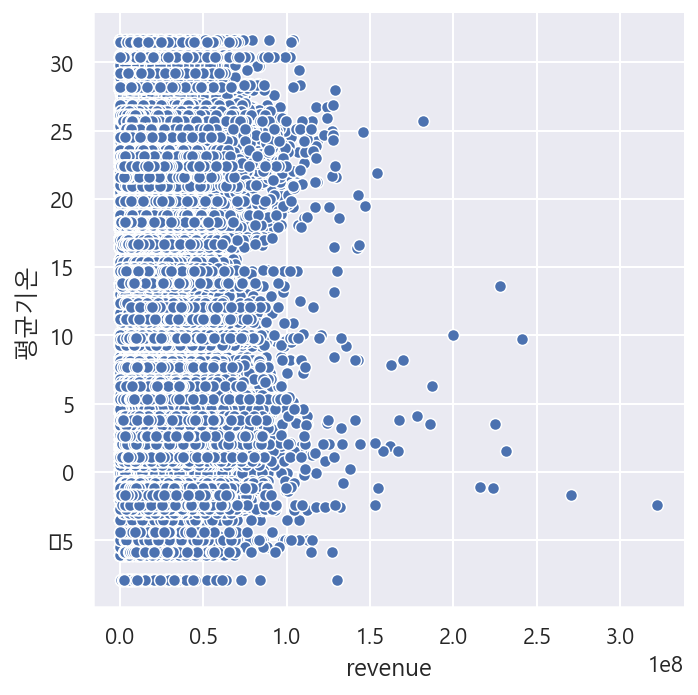

In [11]:
# 평균기온 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='revenue', y='평균기온')

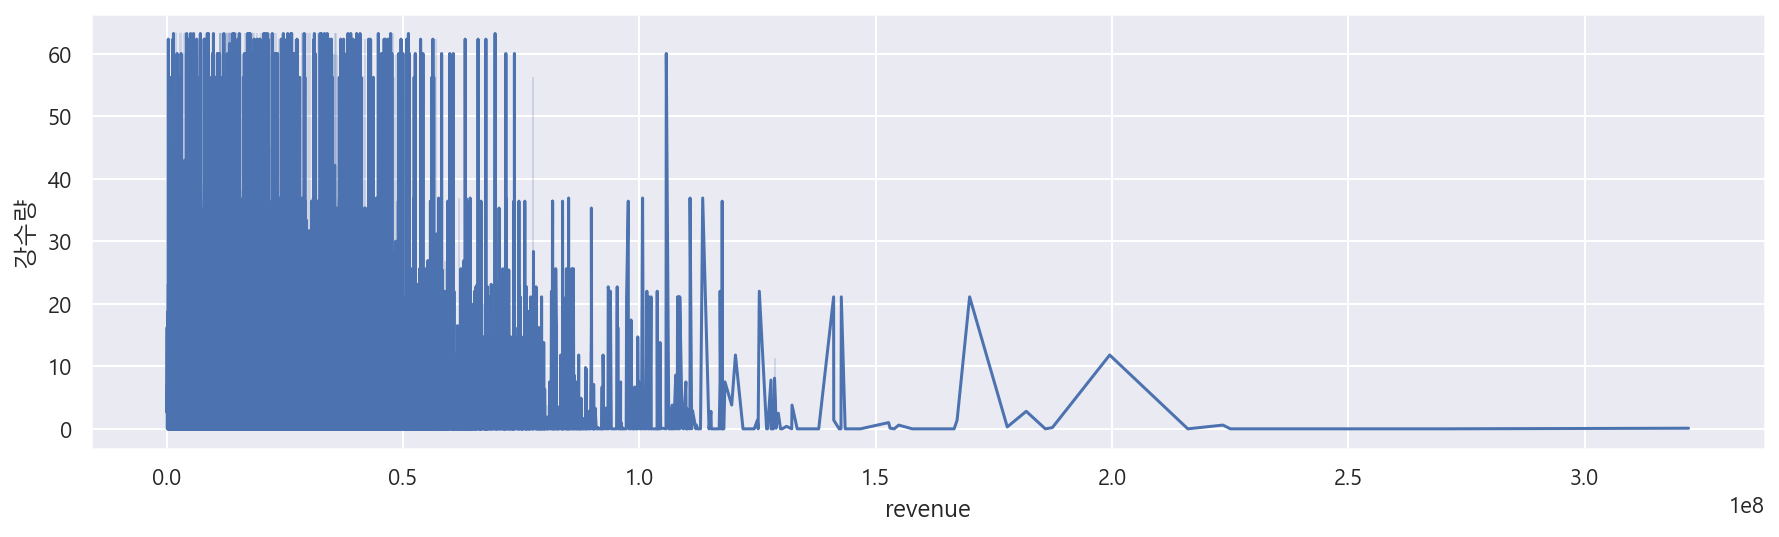

In [12]:
# 강수량 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='강수량')

<Figure size 1080x288 with 0 Axes>

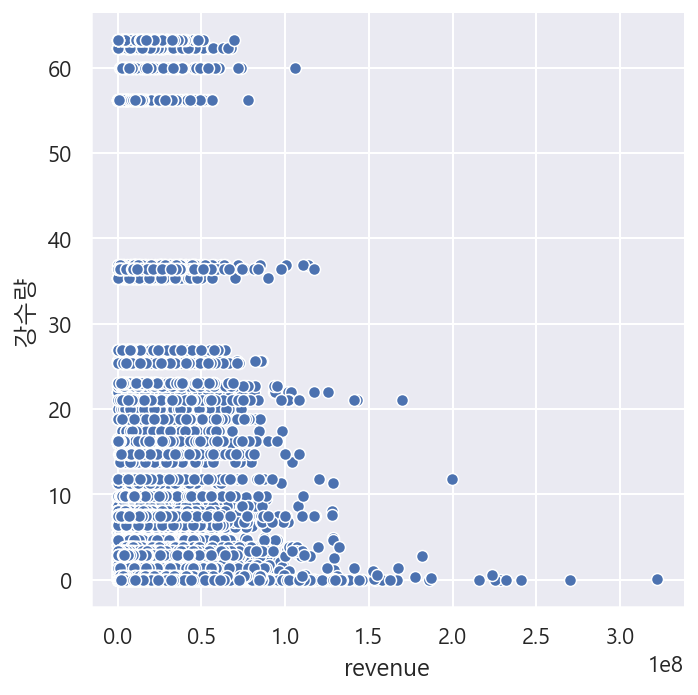

In [13]:
# 강수량 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='revenue', y='강수량')

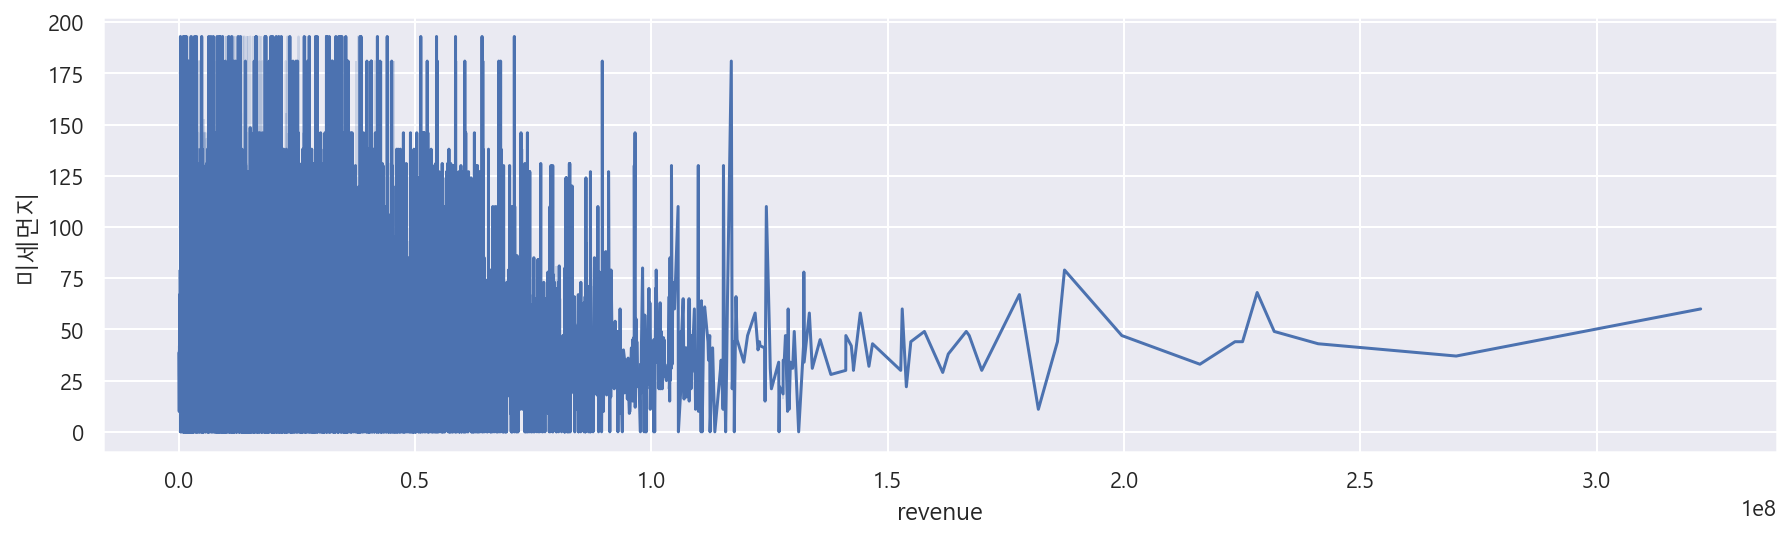

In [14]:
# 미세먼지 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='미세먼지')

<Figure size 1080x288 with 0 Axes>

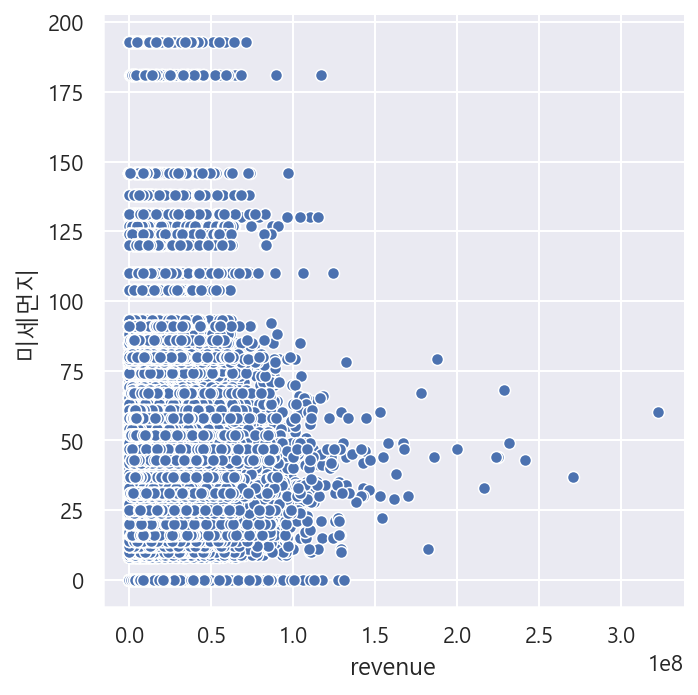

In [16]:
# 미세먼지 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='revenue', y='미세먼지')

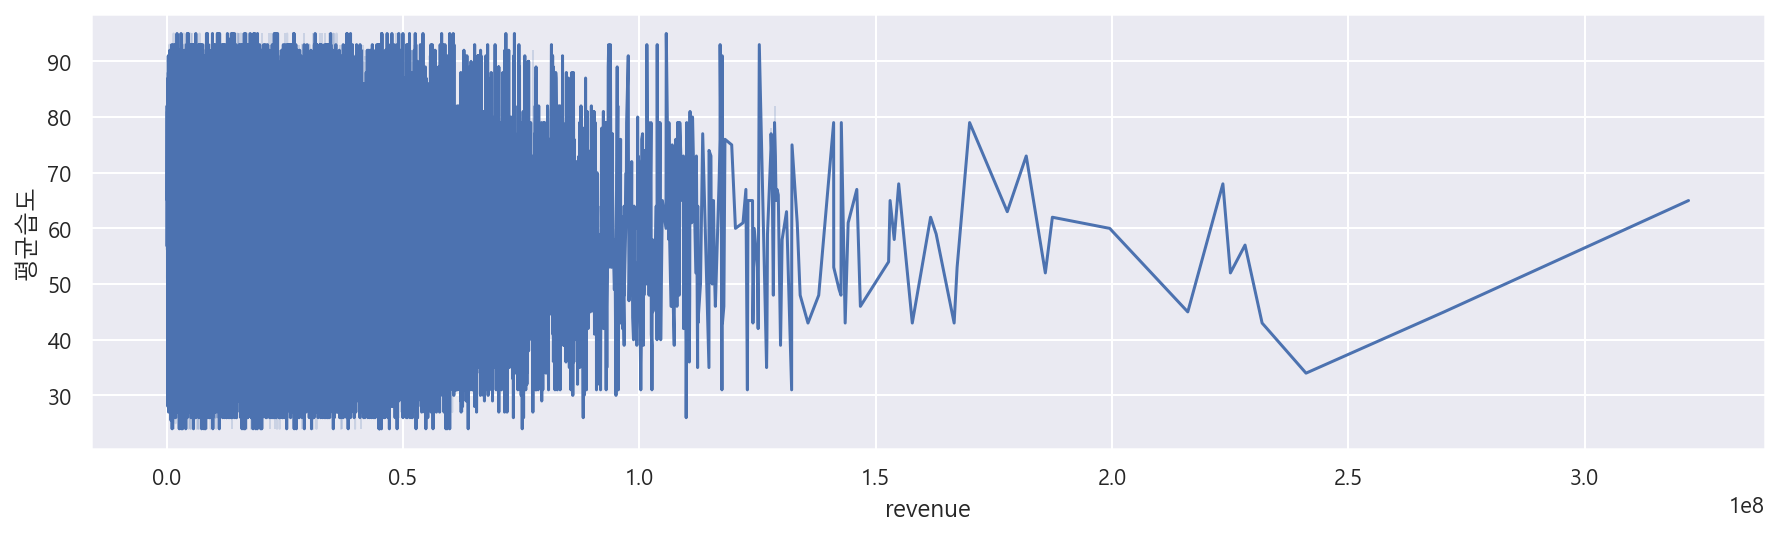

In [17]:
# 평균습도 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='평균습도')

<Figure size 1080x288 with 0 Axes>

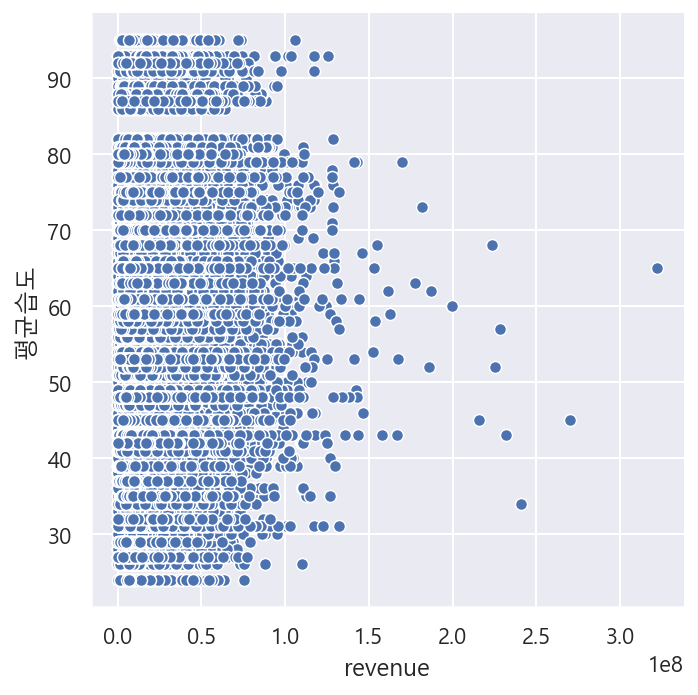

In [18]:
# 평균습도 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='revenue', y='평균습도')

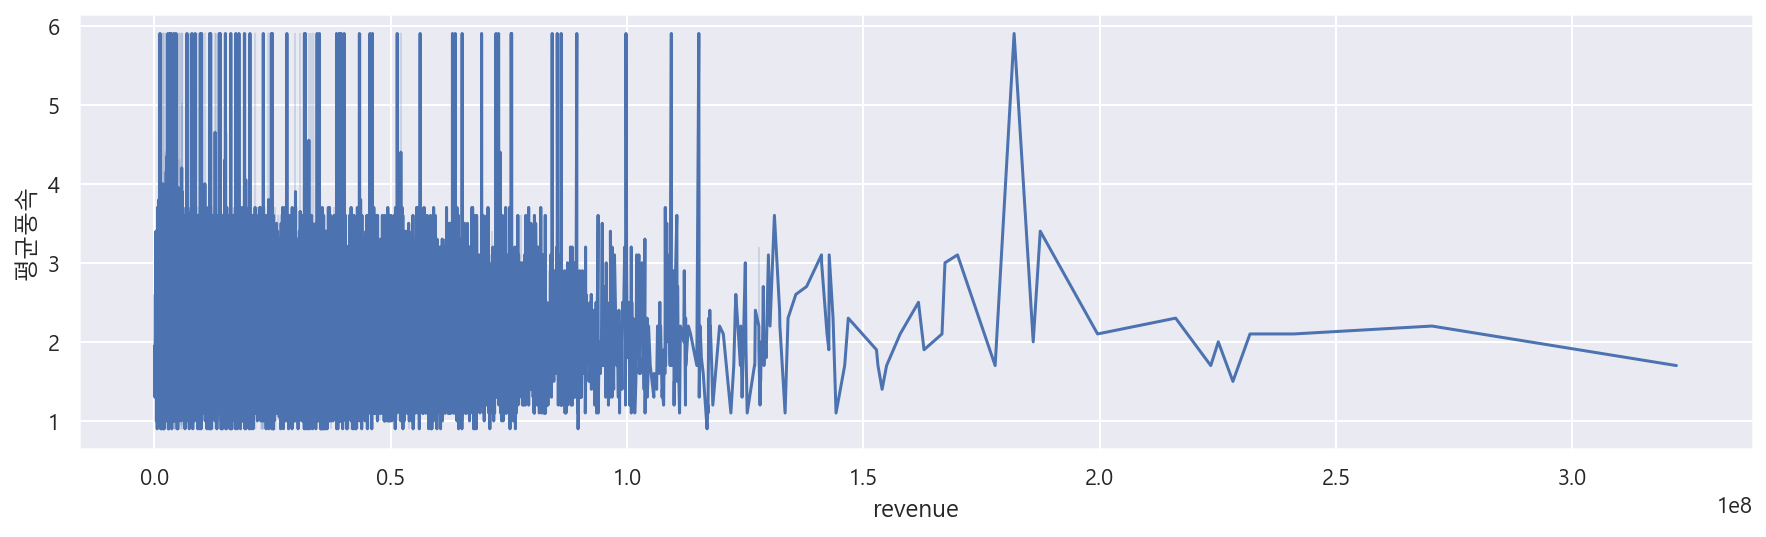

In [19]:
# 평균풍속 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='평균풍속')

<Figure size 1080x288 with 0 Axes>

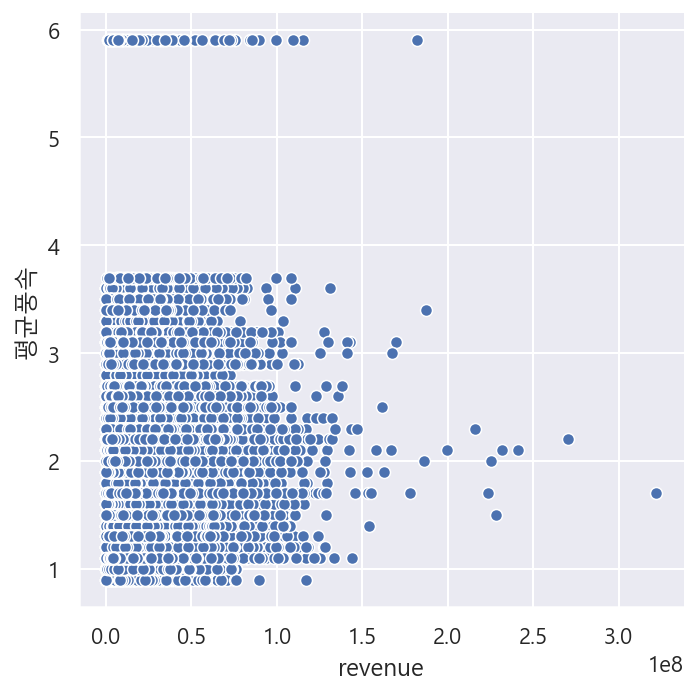

In [20]:
# 평균풍속 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='revenue', y='평균풍속')

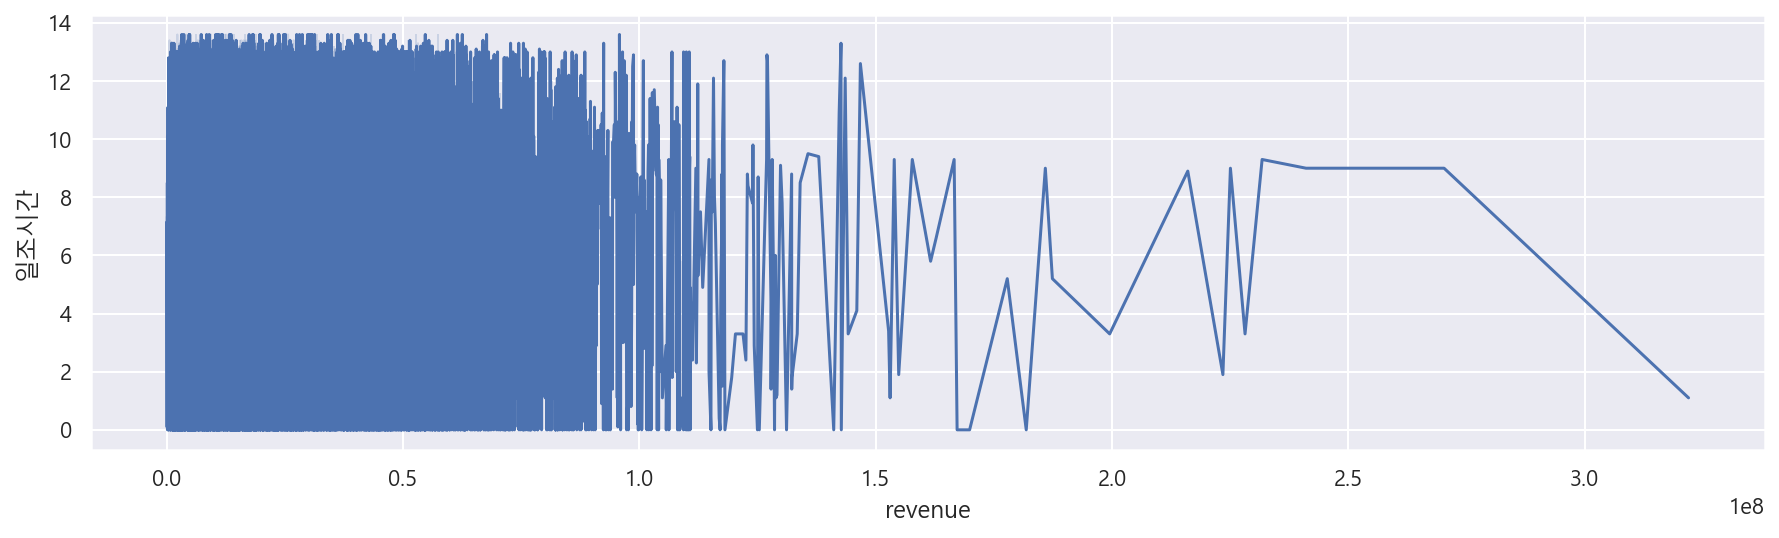

In [35]:
# 일조시간 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='일조시간')

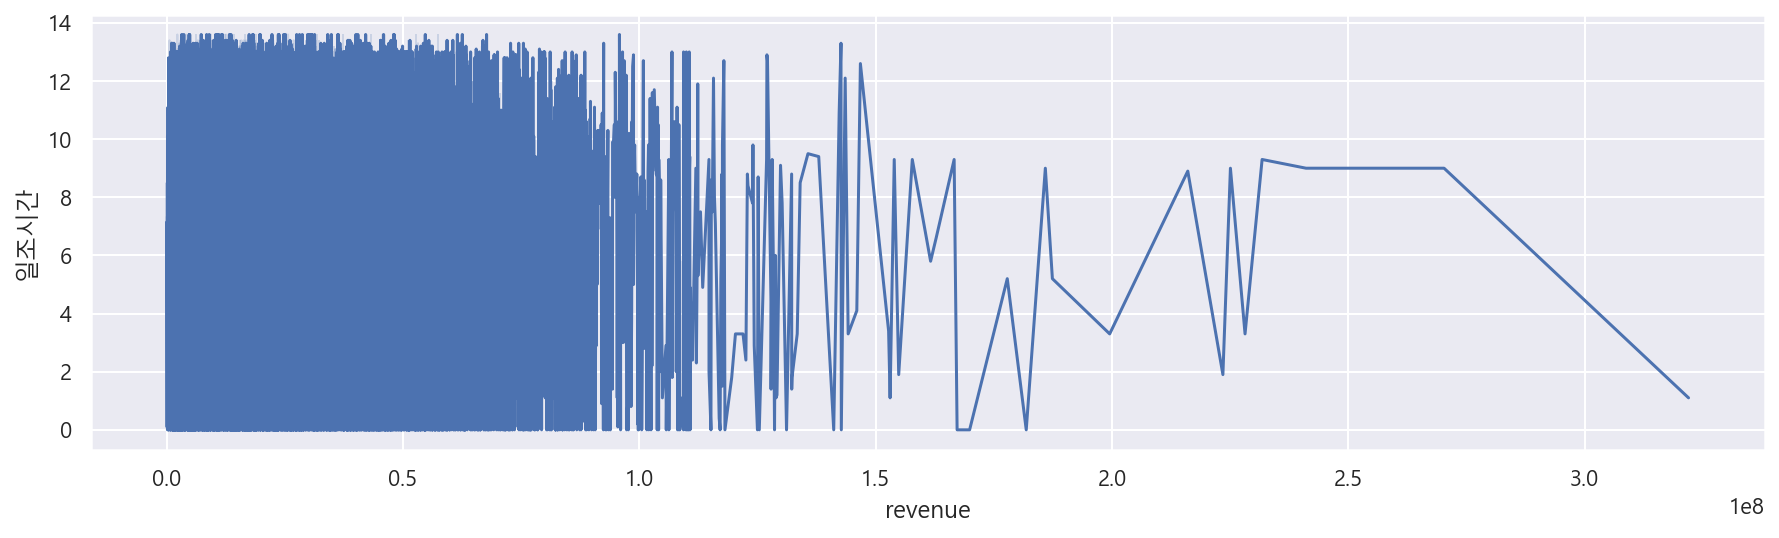

In [24]:
# 일조시간 x revenue - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='revenue', y='일조시간')

### count - 서울 평균기온, 강수량, 미세먼지, 평균습도, 평균풍속, 일조량

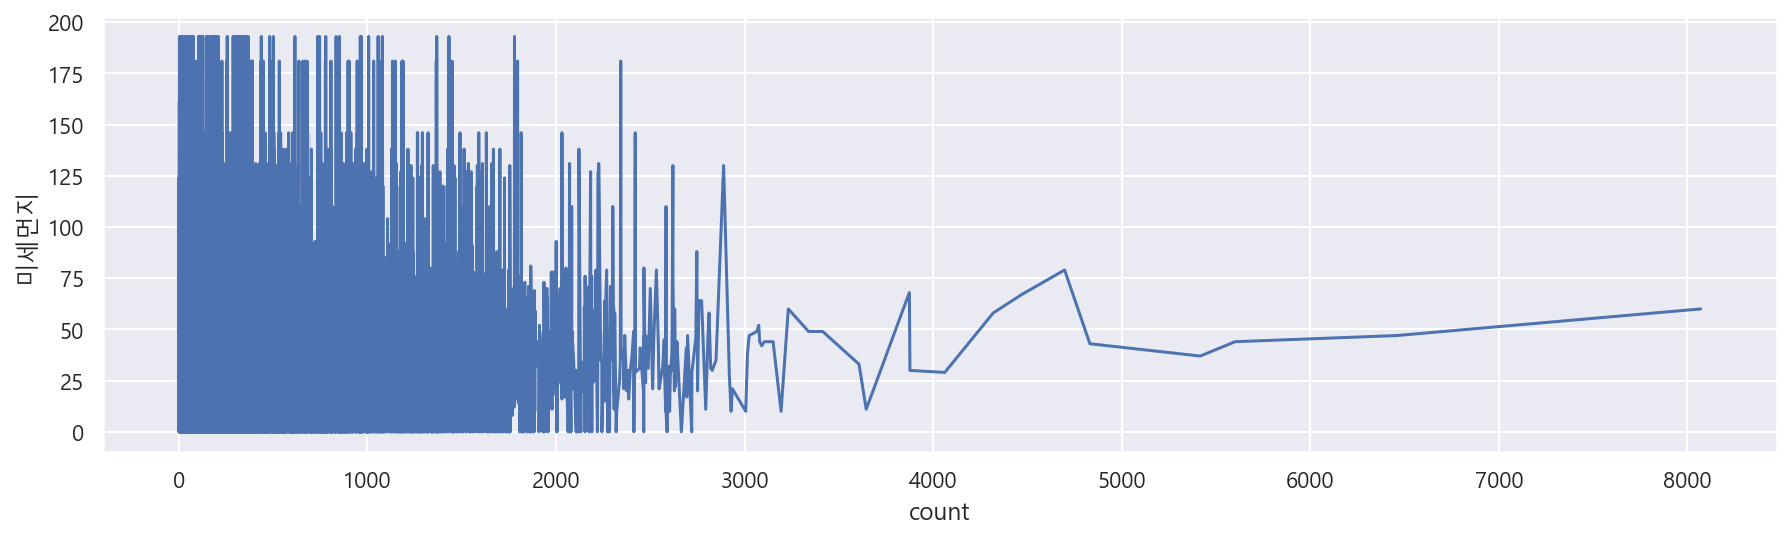

In [25]:
# 미세먼지 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='미세먼지')

<Figure size 1080x288 with 0 Axes>

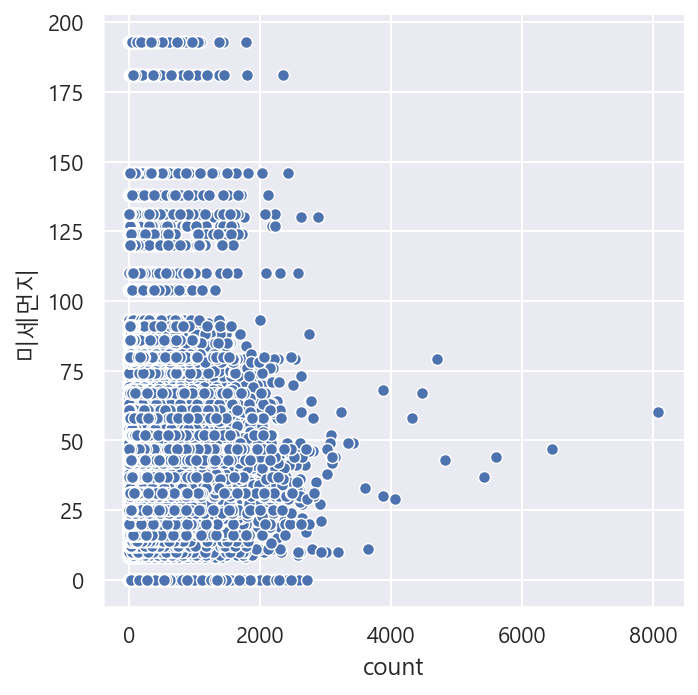

In [26]:
# 미세먼지 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='count', y='미세먼지')

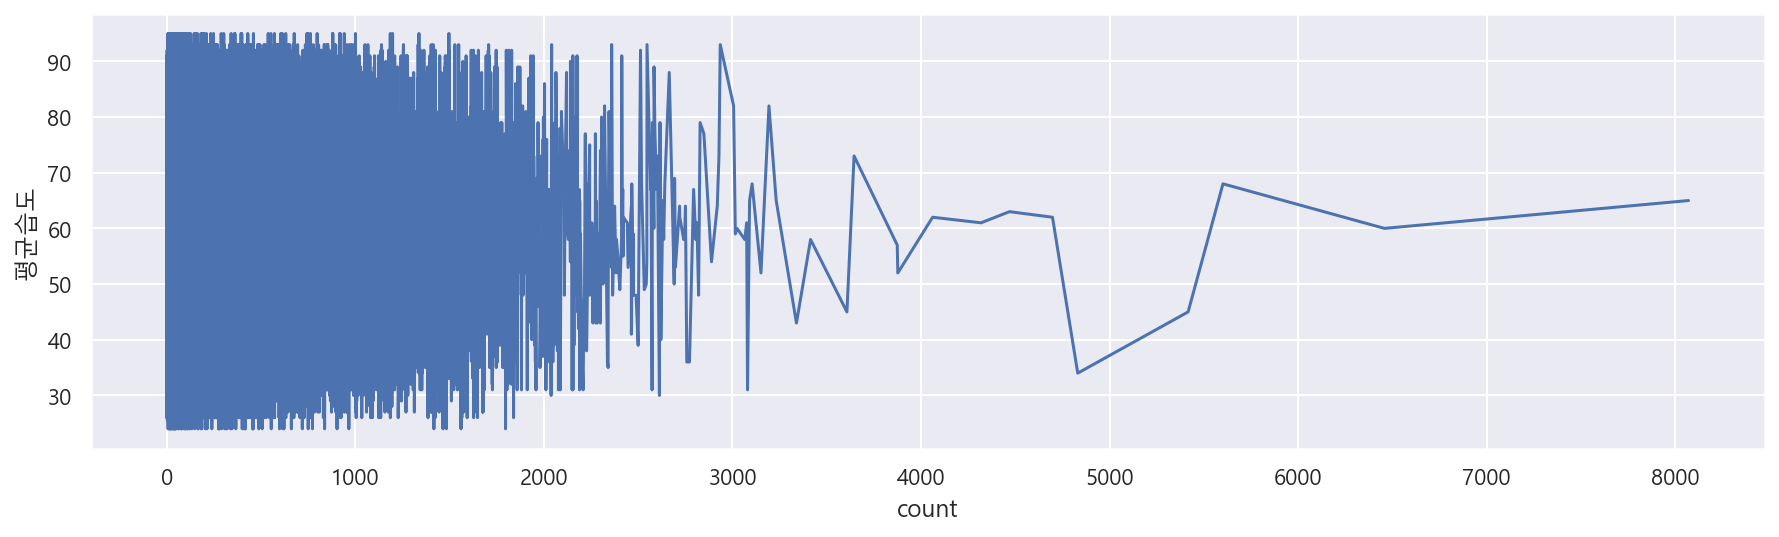

In [27]:
# 평균습도 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='평균습도')

<Figure size 1080x288 with 0 Axes>

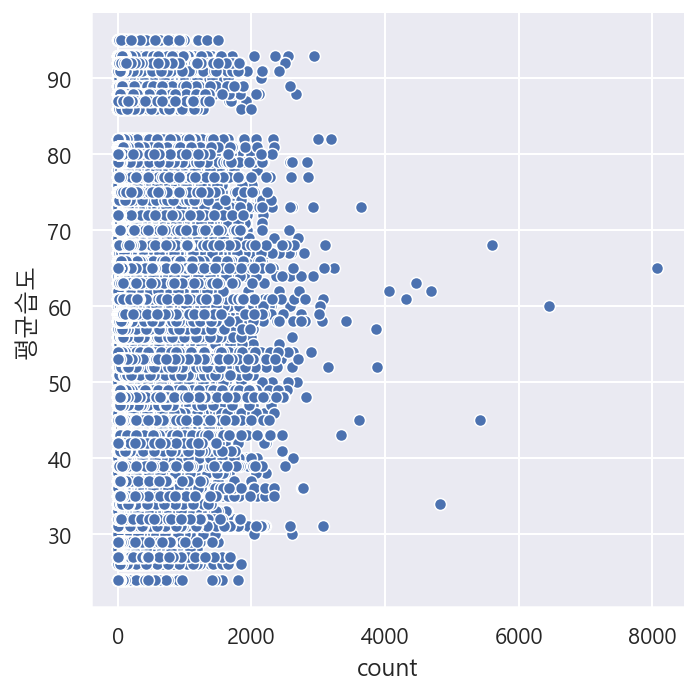

In [28]:
# 평균습도 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='count', y='평균습도')

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


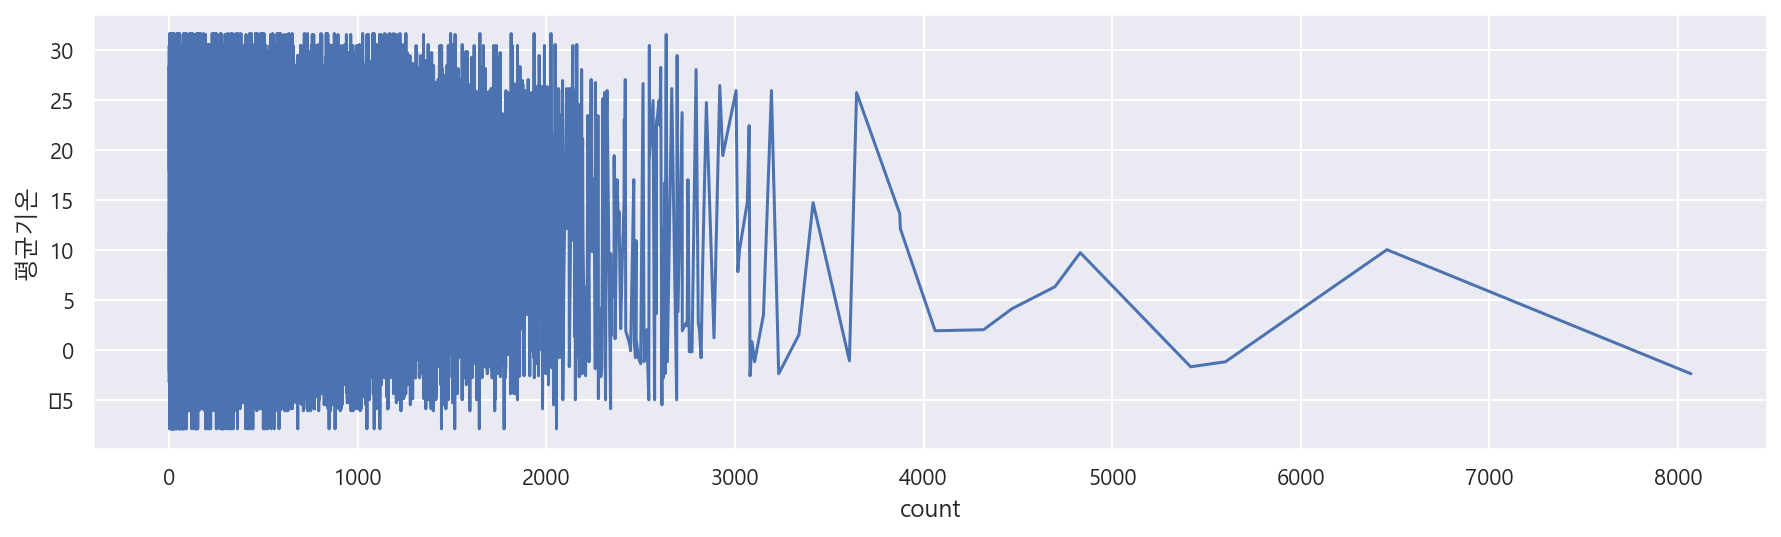

In [29]:
# 평균기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='평균기온')

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1080x288 with 0 Axes>

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


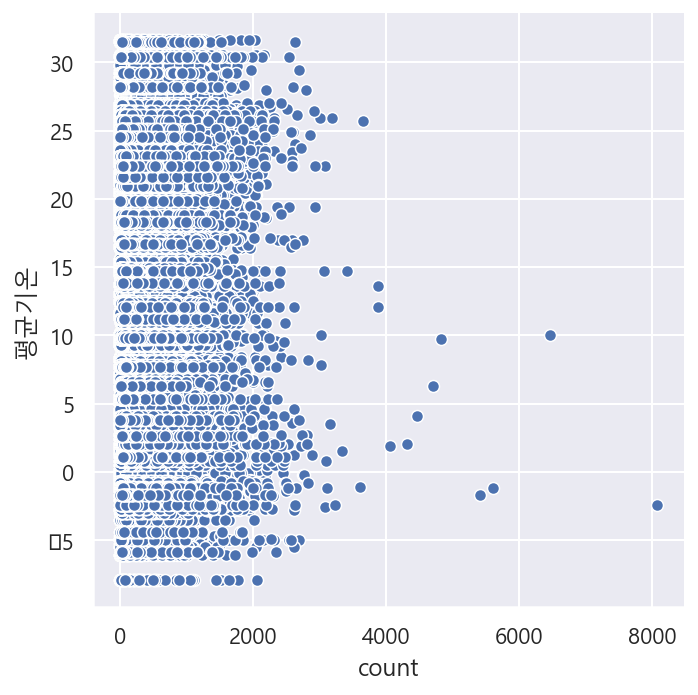

In [30]:
# 평균기온 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='count', y='평균기온')

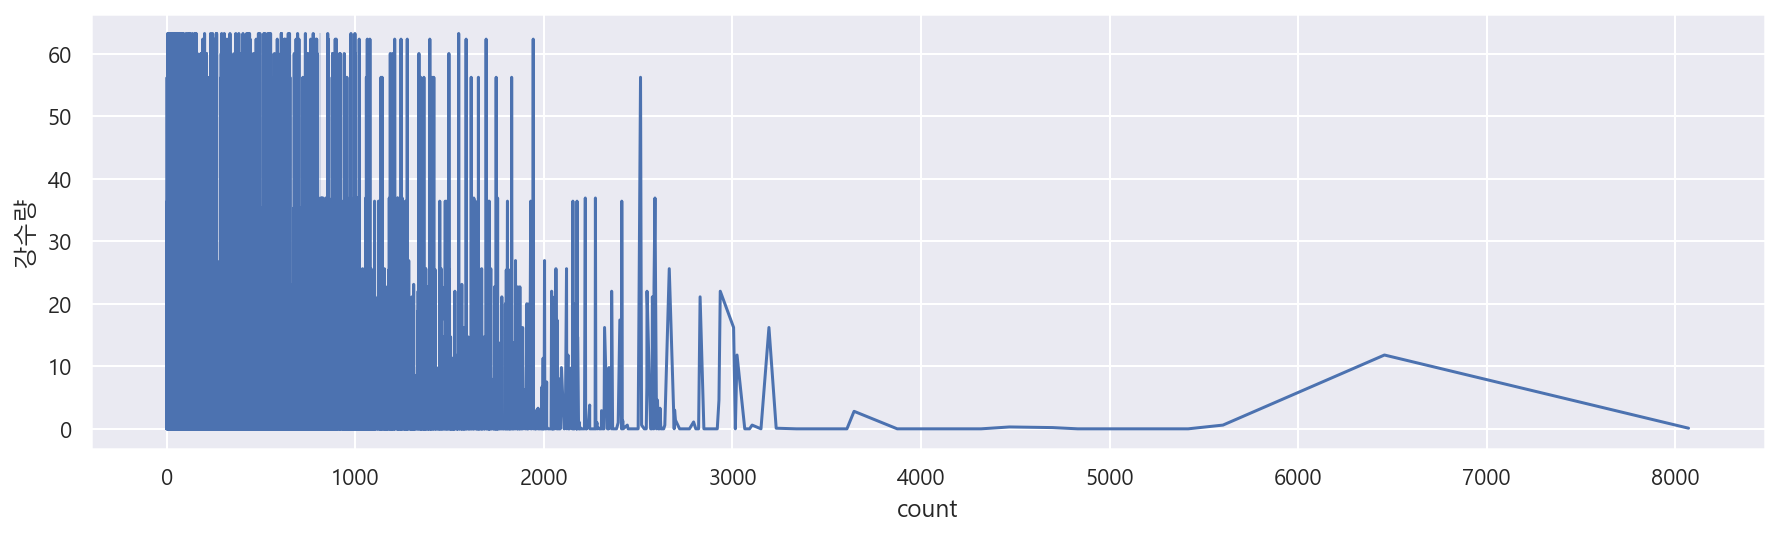

In [31]:
# 강수량 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='강수량')

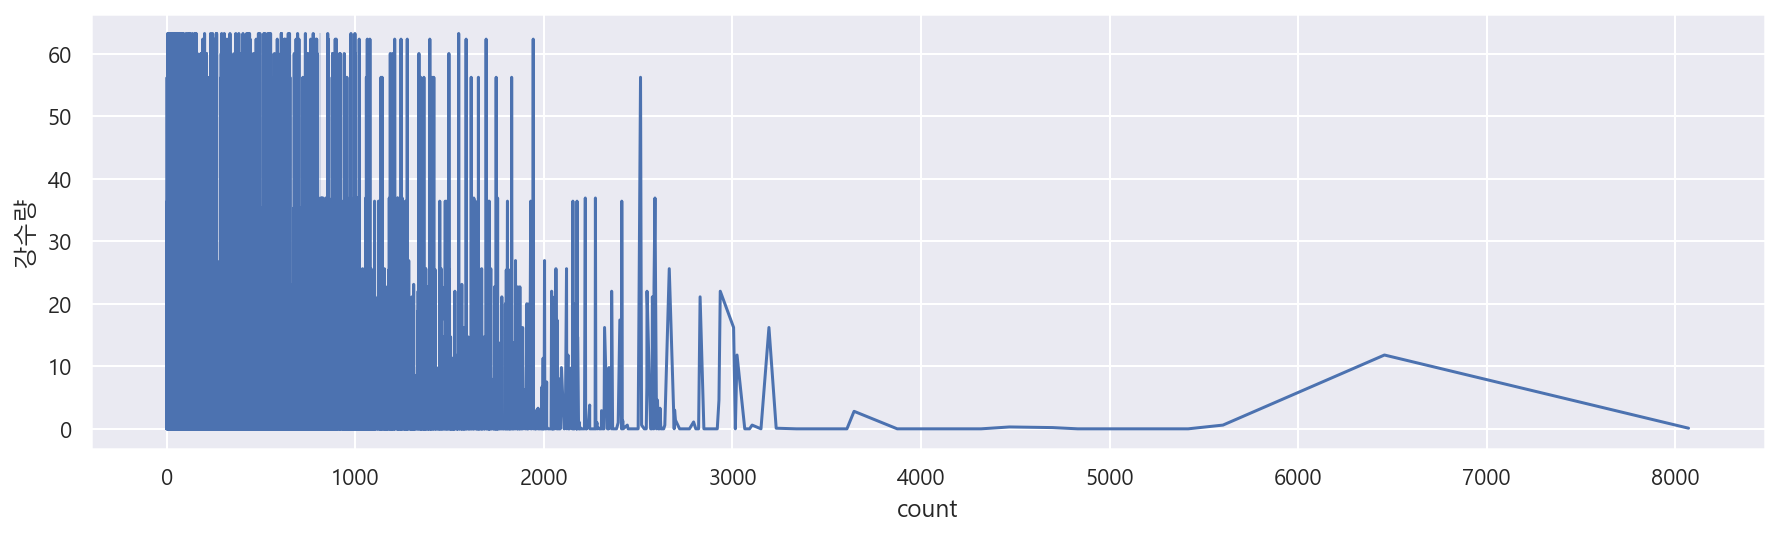

In [32]:
# 강수량 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='강수량')

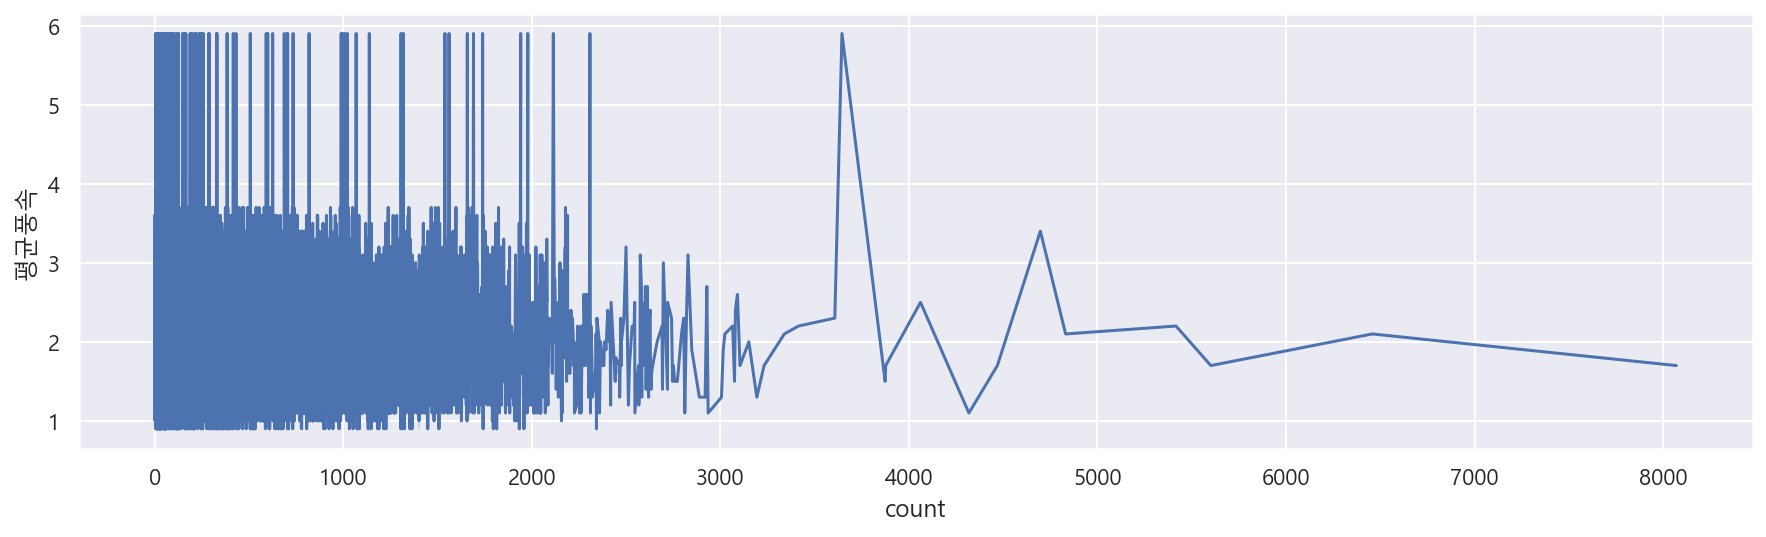

In [36]:
# 평균풍속 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='평균풍속')

<Figure size 1080x288 with 0 Axes>

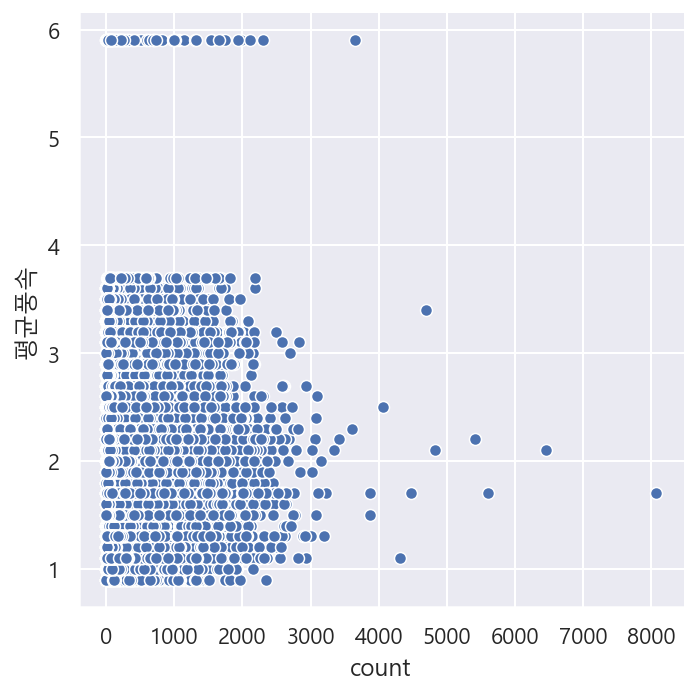

In [38]:
# 평균풍속 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='count', y='평균풍속')

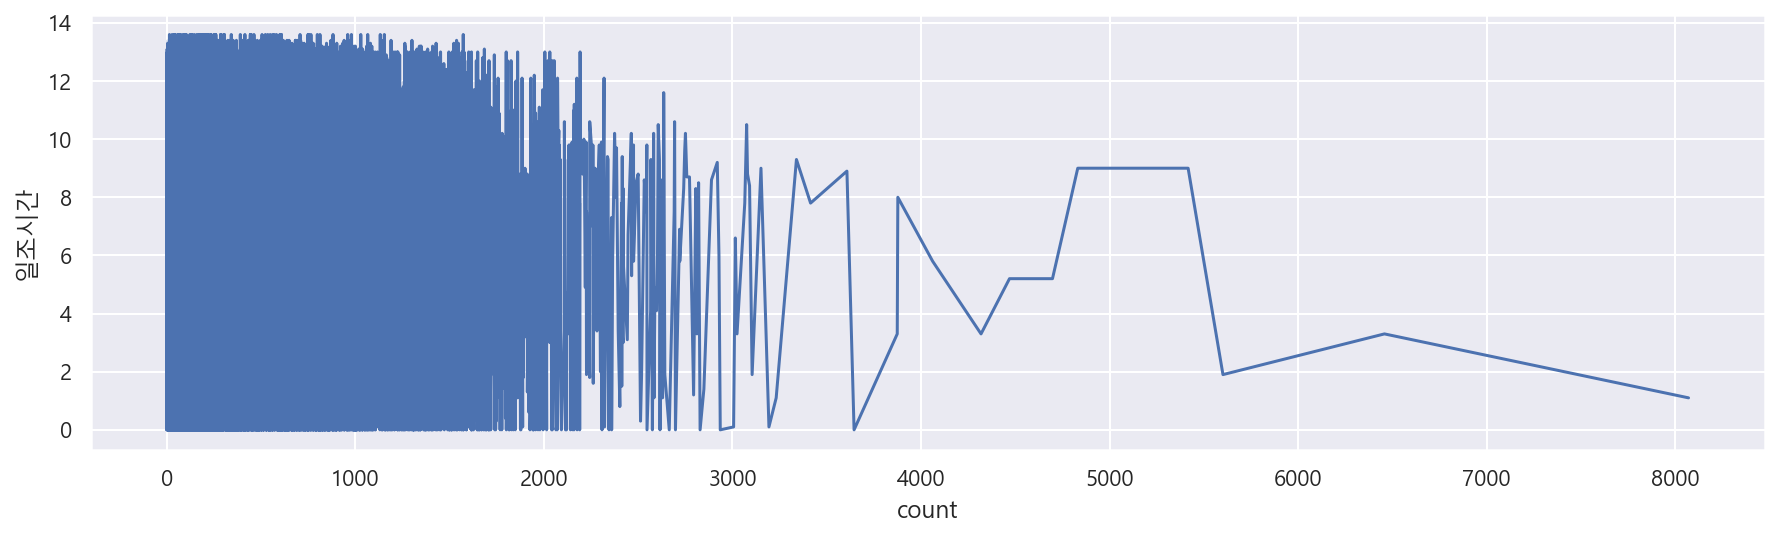

In [39]:
# 일조시간 x count - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='count', y='일조시간')

<Figure size 1080x288 with 0 Axes>

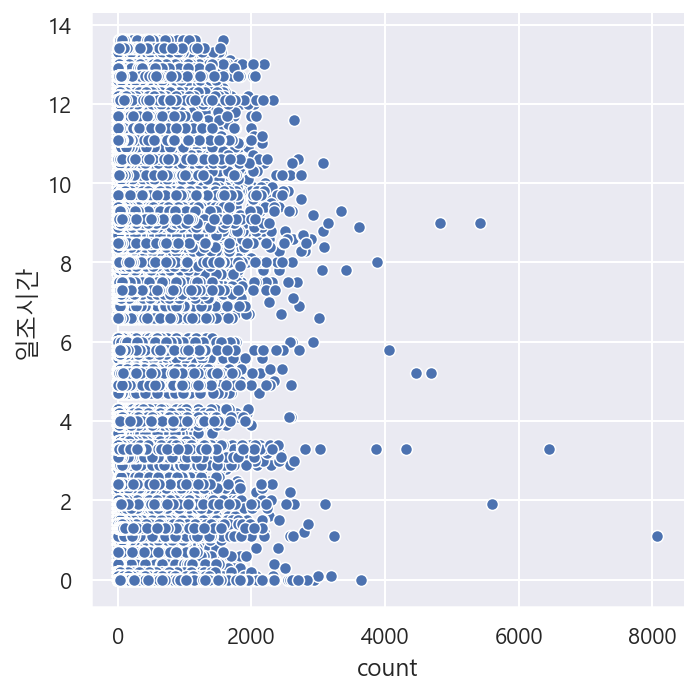

In [40]:
# 일조시간 x count - 시각화
plt.figure(figsize=(15,4))
sns.relplot(data=ns, x='count', y='일조시간')

### category - 서울 평균기온, 강수량, 미세먼지, 평균습도, 평균풍속, 일조시간

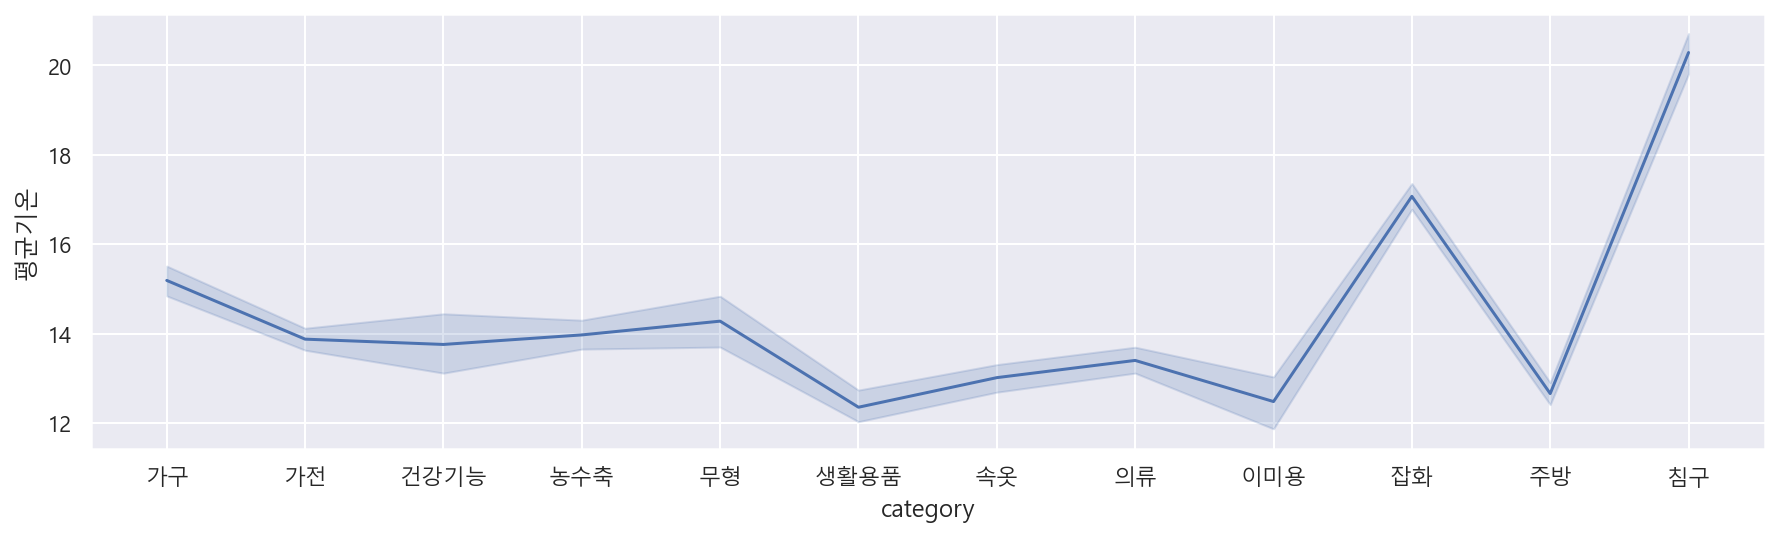

In [41]:
# 평균기온 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='평균기온')

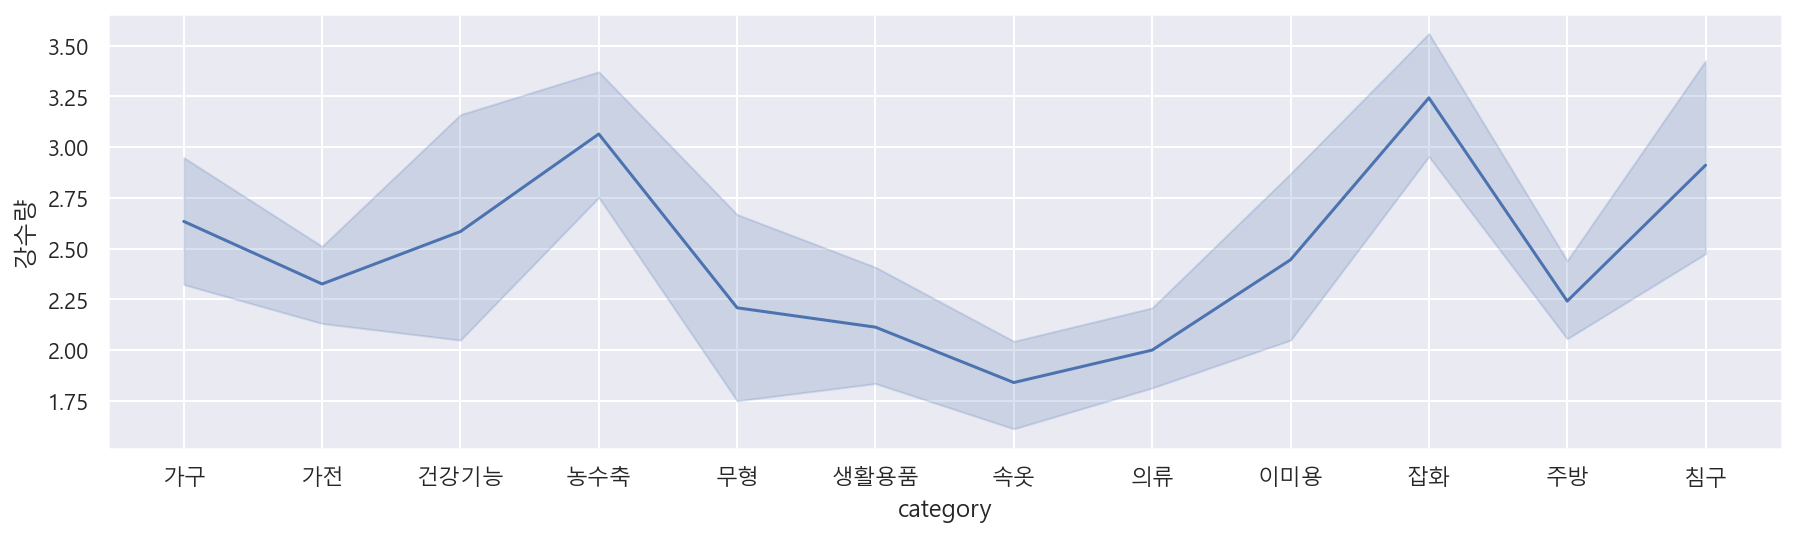

In [42]:
# 강수량 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='강수량')

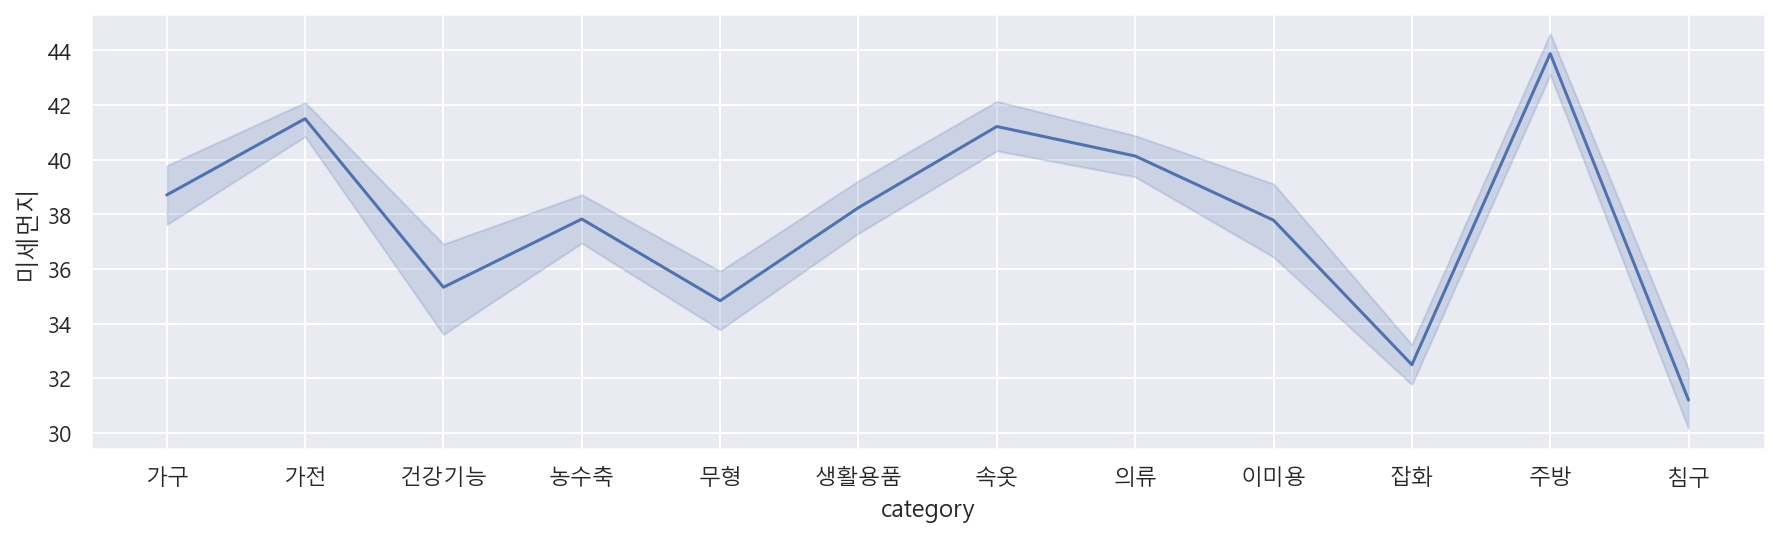

In [43]:
# 미세먼지 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='미세먼지')


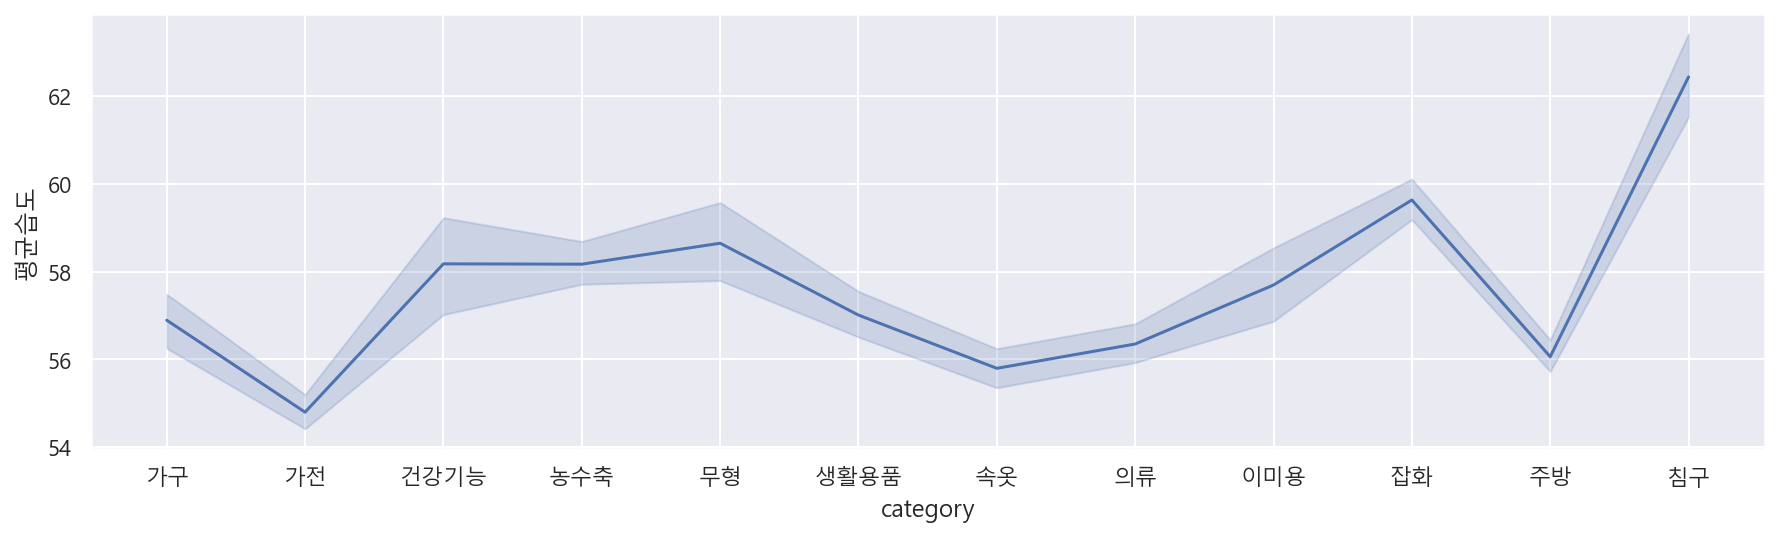

In [44]:
# 평균습도 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='평균습도')

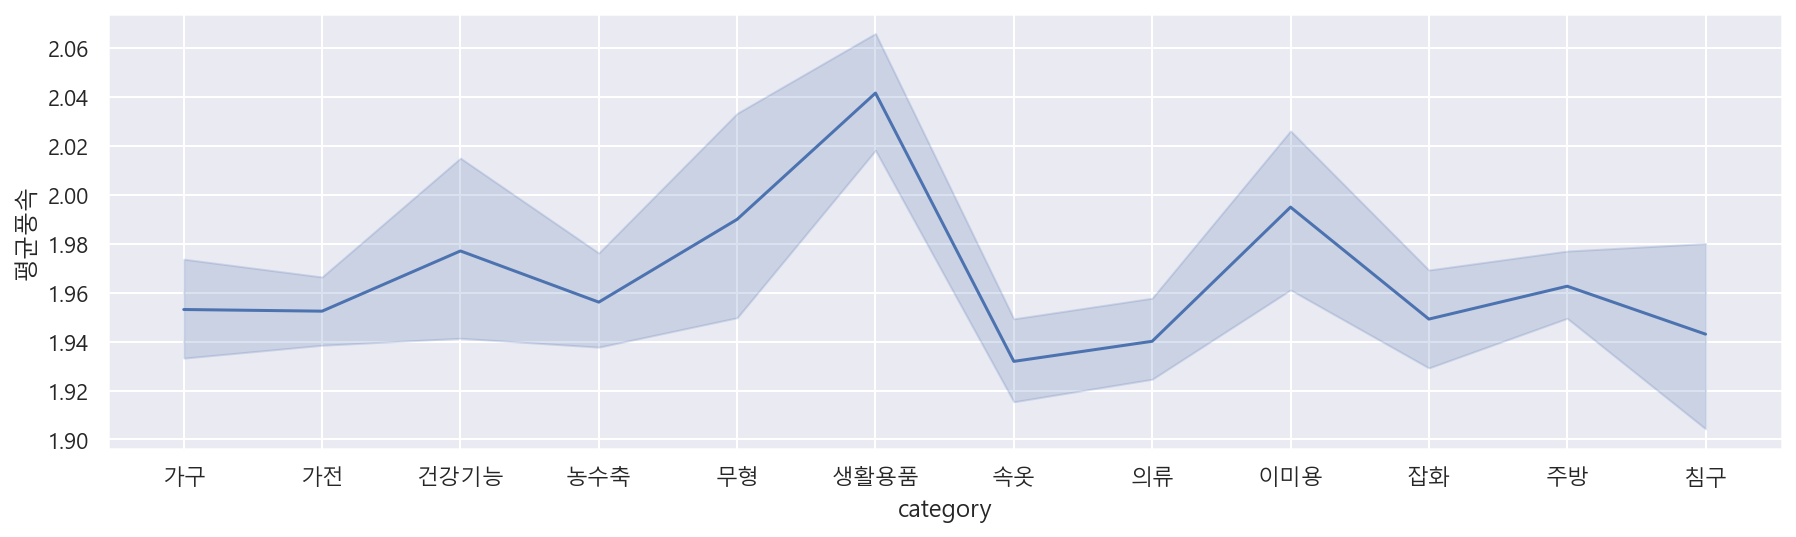

In [45]:
# 평균풍속 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='평균풍속')

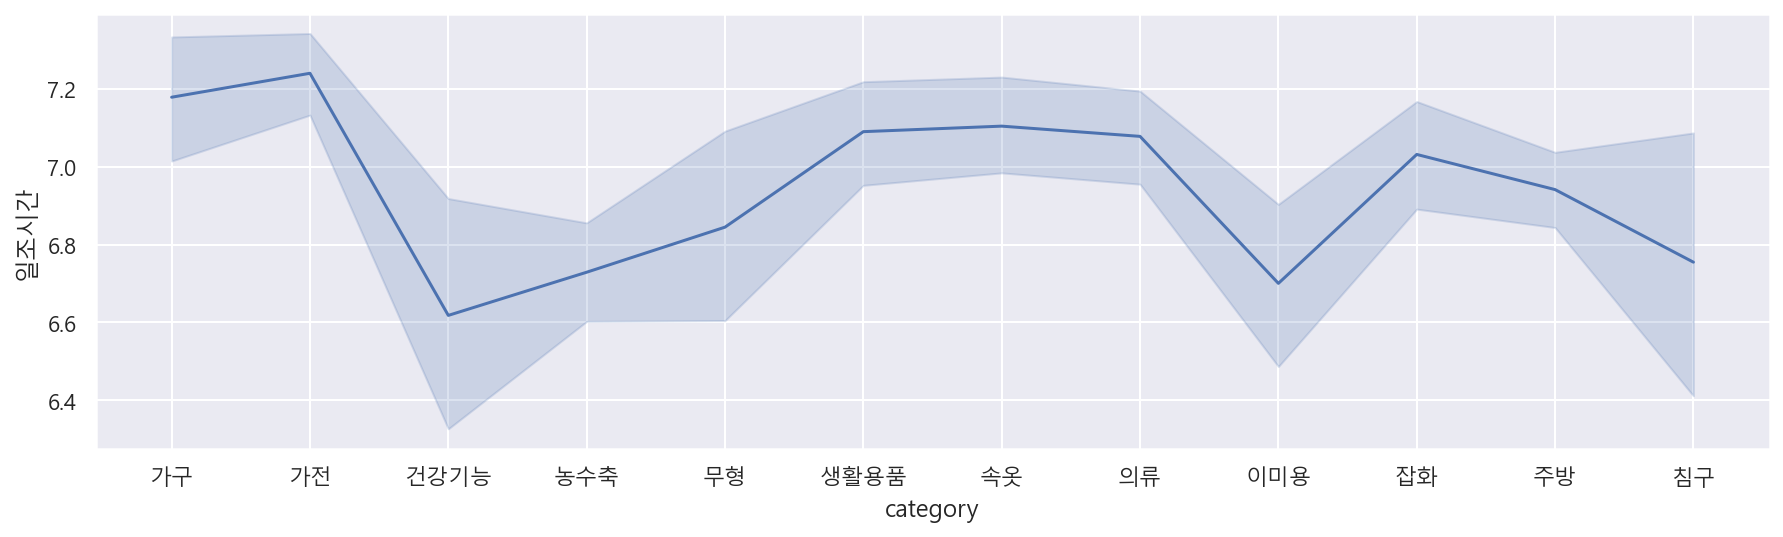

In [46]:
# 일조시간 x category - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='category', y='일조시간')

### sex - 서울 평균기온, 강수량, 미세먼지, 평균습도, 평균풍속, 일조시간

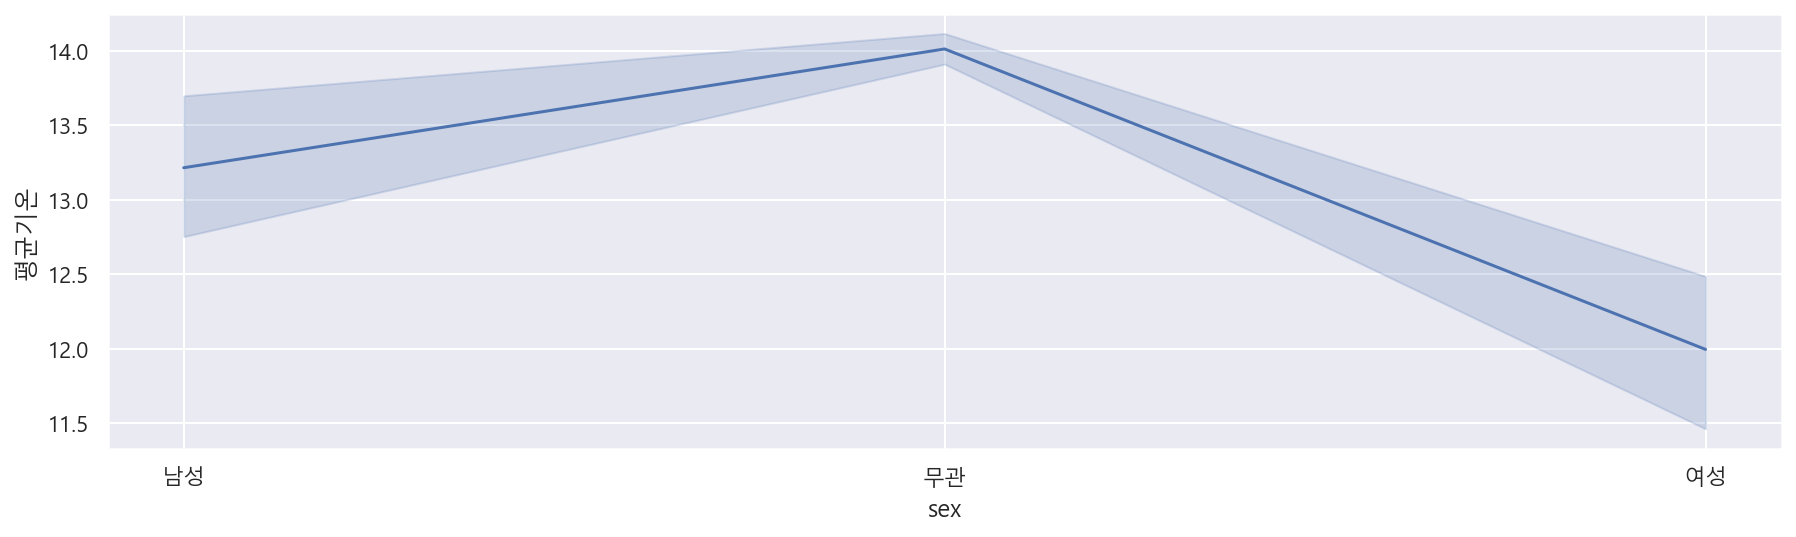

In [48]:
# 평균기온 x sex - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='sex', y='평균기온')

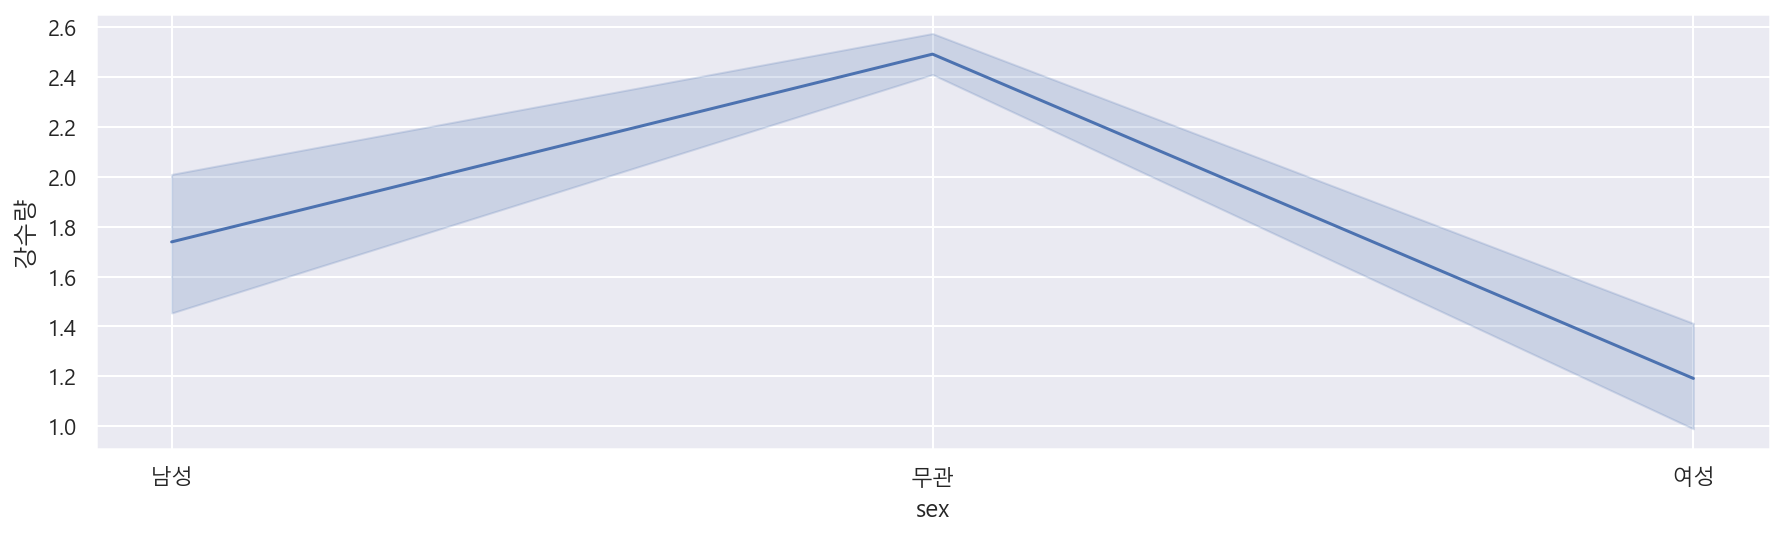

In [51]:
# 강수량 x sex - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='sex', y='강수량')

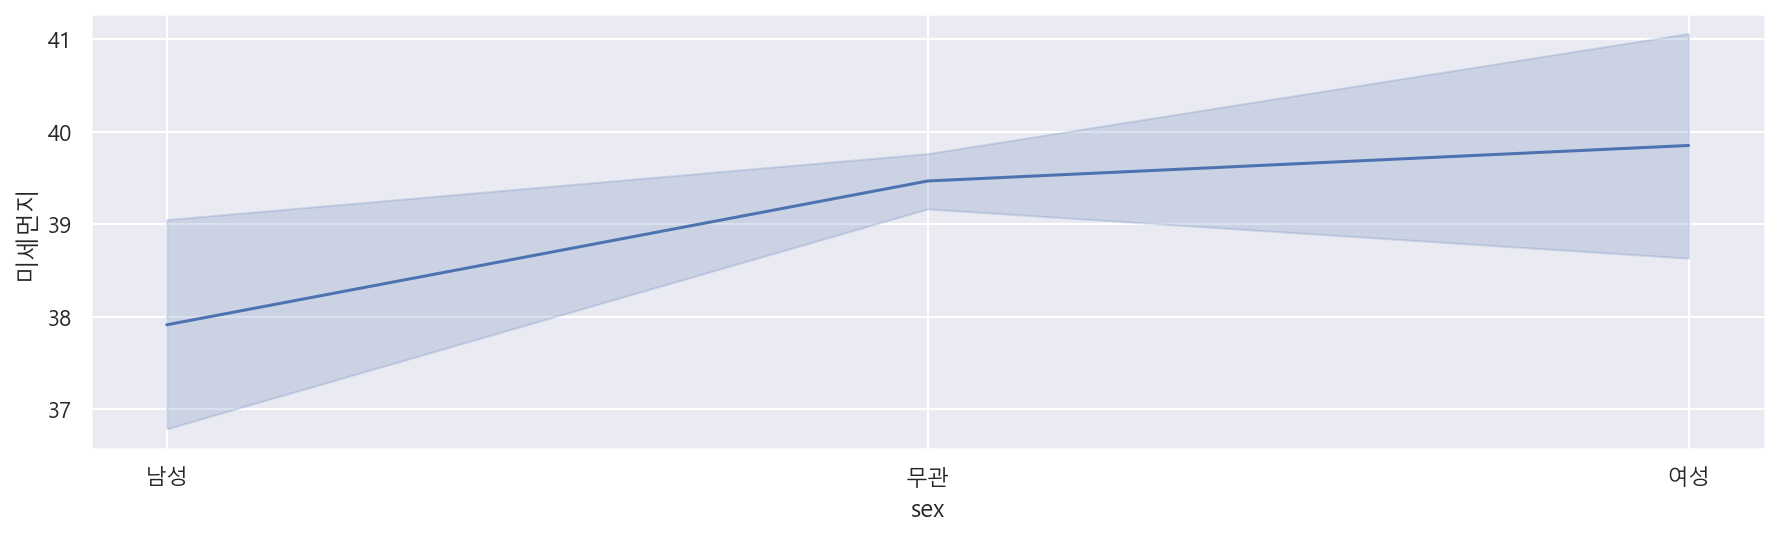

In [52]:
# 미세먼지 x sex - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='sex', y='미세먼지')

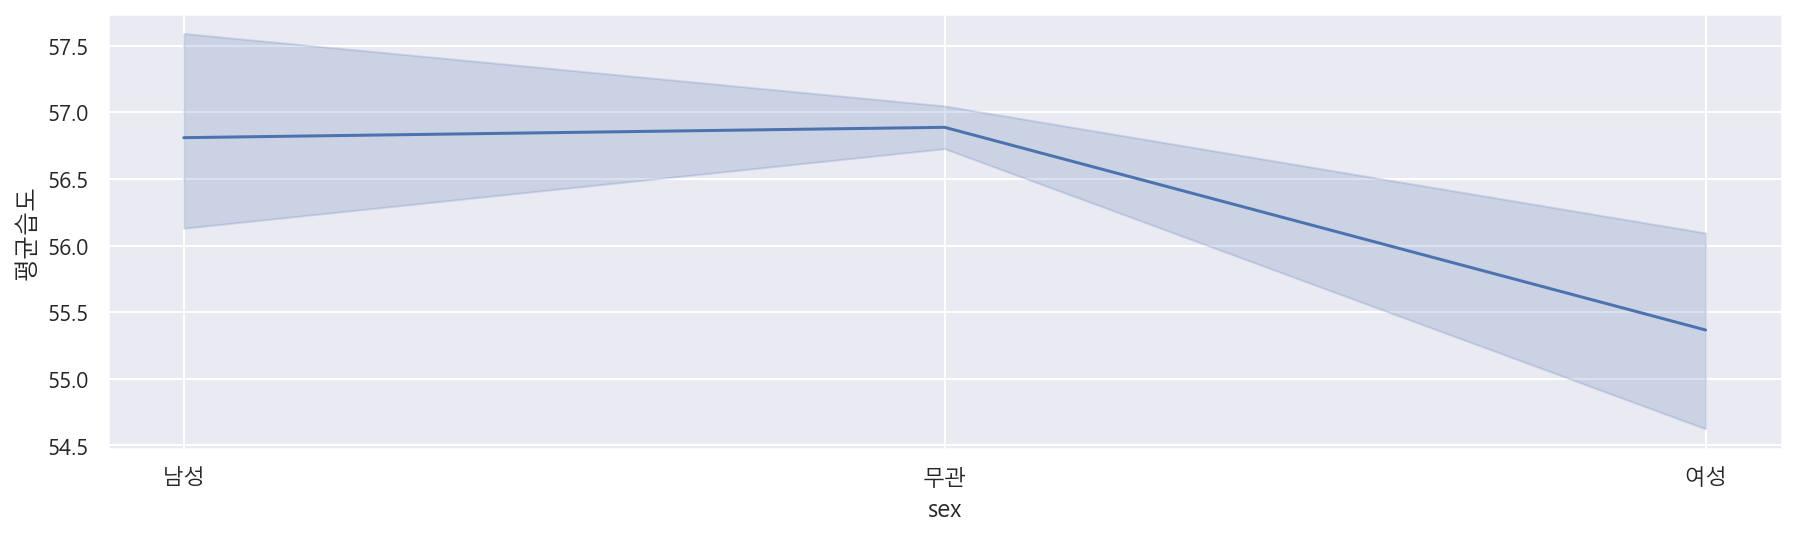

In [53]:
# 평균습도 x sex - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='sex', y='평균습도')

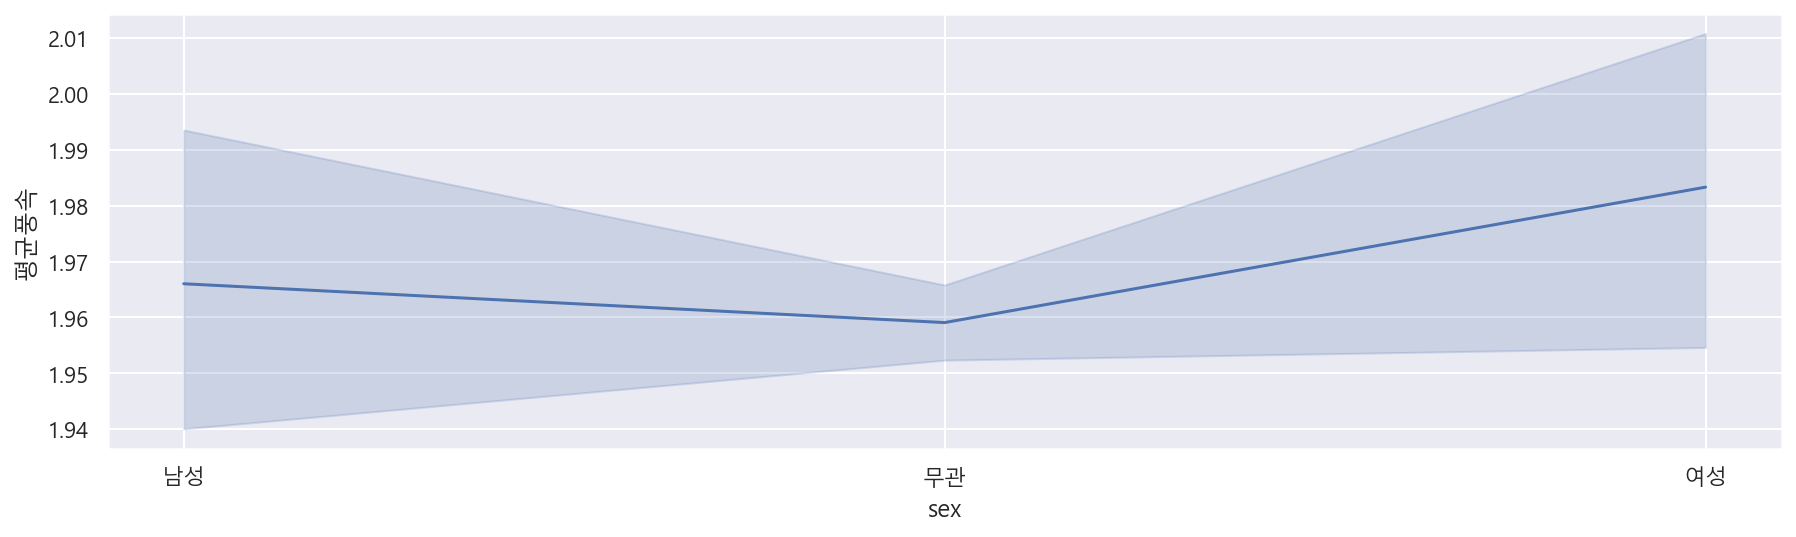

In [54]:
# 평균풍속 x sex - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='sex', y='평균풍속')

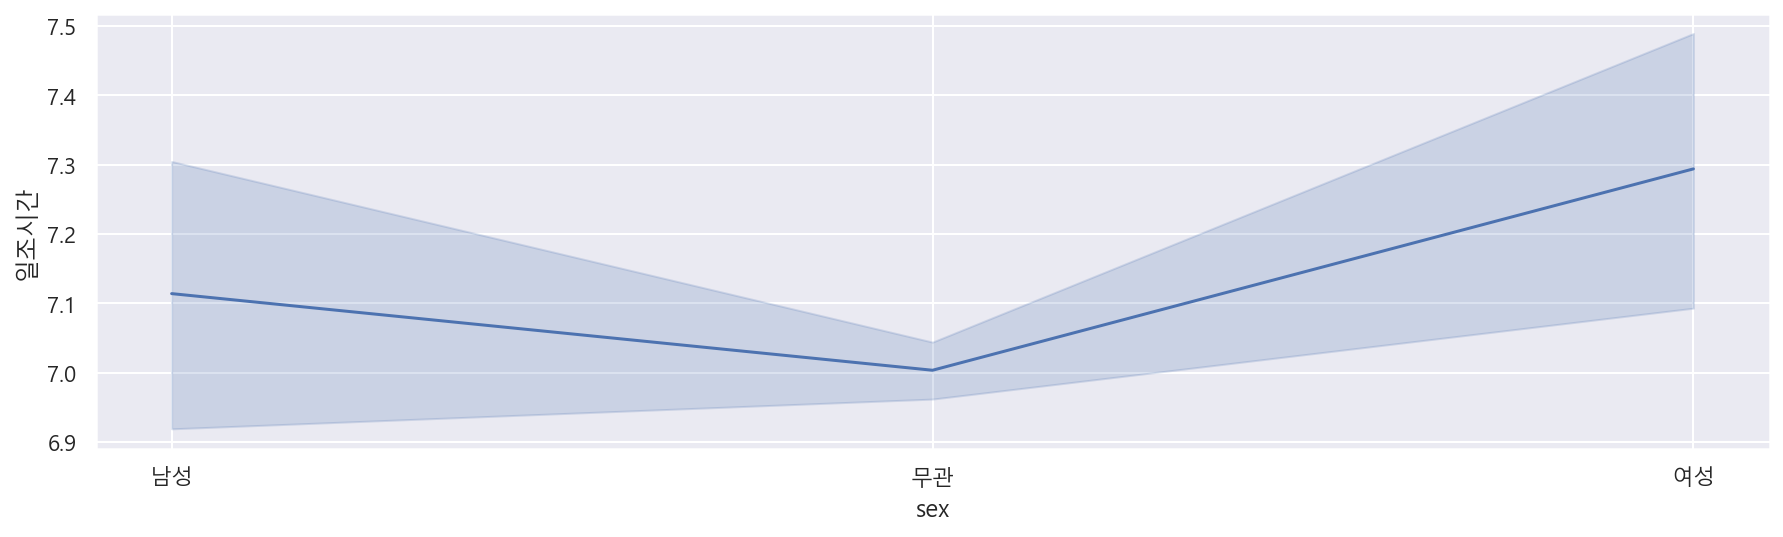

In [50]:
# 일조시간 x sex - 시각화
plt.figure(figsize=(15,4))
sns.lineplot(data=ns, x='sex', y='일조시간')